In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
x=np.array([5,15,25,35,45,55])
y=np.array([11,16,18,30,22,38])


Text(0, 0.5, 'Cholesterol')

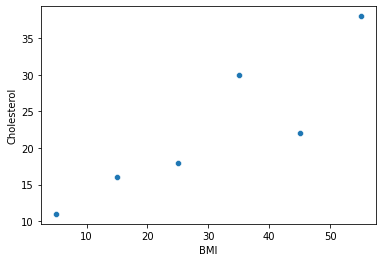

In [ ]:
sns.scatterplot(x=x,y=y)
plt.xlabel('BMI')
plt.ylabel('Cholesterol')

In [ ]:
meanx=x.mean()
meanx

30.0

In [ ]:
meany=y.mean()
meany

22.5

In [ ]:
def calc(x,y):
  list=[]
  sumnumer=0
  sumdenom=0
  meanx=x.mean()
  meany=y.mean()
  l=len(x)
  for i in range(l):
    xval=x[i].astype(int)
    yval=y[i].astype(int)
    sumnumer=sumnumer+((xval-meanx)*(yval-meany))
    sumdenom=sumdenom+((xval-meanx)*(xval-meanx))
  b1=sumnumer/sumdenom
  b0=meany-(b1*meanx)
  list=[b0,b1]
  return list

In [ ]:
list=calc(x,y)

In [ ]:
def predict(x,list):
  y=list[0]+(list[1]*x)
  return y

In [ ]:
predict(27,list)

21.085714285714285

Text(0, 0.5, 'Cholesterol')

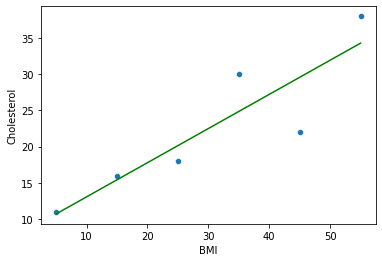

In [ ]:
plt.subplot(1,1,1)
plt.plot(x, predict(x,list), color = "g")
sns.scatterplot(x=x,y=y)
plt.xlabel('BMI')
plt.ylabel('Cholesterol')

In [ ]:
def rsquare(x,list):
  sst=0
  sse=0
  l=len(x)
  for i in range(l):
    sst=sst+((y[i]-meany)**2)
    predy=predict(x[i],list)
    sse=sse+((y[i]-predy)**2)
  rsquareval=1-(sse)/sst
  return rsquareval

In [ ]:
rsquare(x,list)

0.7913094027030955

In [ ]:
x.shape

(6,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x_2d=x[:,np.newaxis]
x_2d.shape
x_2d=x[:,np.newaxis]
x_2d.shape



(6, 1)

In [ ]:
reg=LinearRegression().fit(X=x_2d,y=y)
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([27]).reshape(-1,1)))
print(reg.predict(x_2d))


print(r2_score(reg.predict(x.reshape(-1,1)),y))

[0.47142857]
8.357142857142856
[21.08571429]
[10.71428571 15.42857143 20.14285714 24.85714286 29.57142857 34.28571429]
0.7362718089990817


In [ ]:
df=pd.read_csv('Salary_Data.csv')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
x=df['YearsExperience']
y=df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train.shape

(24,)

In [ ]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [ ]:
x_train.shape 
y_train.shape

(24, 1)

In [ ]:
list=calc(x_train,y_train)
print(list[0])
print(list[1])
slope=list[0]
intercept=list[1]

[26869.11518458]
[9294.97722875]


In [ ]:
print(slope)

[26869.11518458]


In [ ]:
print(intercept)

[9294.97722875]


In [ ]:
print(reg.predict(x_train))

[12.88285714 10.24285714 10.85571429 12.08142857  9.72428571 10.76142857
  9.86571429 10.47857143 12.22285714 11.56285714  8.97       13.30714286
  9.77142857  9.39428571 11.13857143 11.18571429 10.10142857  9.86571429
 12.6         9.3         8.87571429 11.70428571 10.66714286 10.24285714]


In [ ]:
print(rsquare(x,list))

[0.99515009]


In [ ]:
x_2=x[:,np.newaxis]
x_2.shape

<ipython-input-227-63dae58d2507>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_2=x[:,np.newaxis]


(30, 1)

In [ ]:
x_3=x[:,np.newaxis]
x_3.shape

<ipython-input-228-91ff5fa59a83>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_3=x[:,np.newaxis]


(30, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# model = LinearRegression()
# model.fit(x_3, y)

Text(0.5, 1.0, 'Years of Experience v/s Salary(Train)')

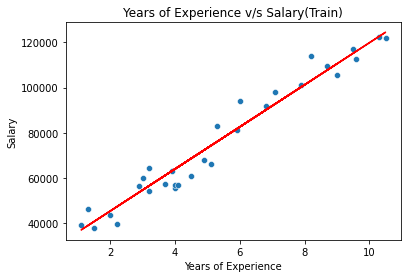

In [ ]:
plt.plot(x_train, predict(x_train,list), color = "r")
sns.scatterplot(x=x,y=y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience v/s Salary(Train)')

Text(0.5, 1.0, 'Years of Experience v/s Salary(Test)')

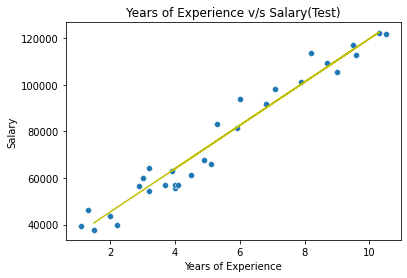

In [ ]:
plt.plot(x_test, predict(x_test,list), color = "y")
sns.scatterplot(x=x,y=y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience v/s Salary(Test)')